In [1]:
%matplotlib inline
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import glob

In [72]:
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
def load_npy(filename):
    return np.load(filename)

### Plotting

In [4]:
def _common_output(filename='output'):
    array = load_npy(filename)
    output_mem = array[:,0]
    output_cpu = array[:,1]
    output_time = array[:,2]
    _mems = []
    _cpus = []
    _times = []
    for i, j, k in zip( output_mem, output_cpu, output_time):
        _mems.extend(i)
        _cpus.extend(j)
        _times.extend(k)
    return _mems, _cpus, _times

### Data directory

In [5]:
workdir='/home/tkurihana/scratch-midway2/parsl/parsl/dataflow/workspace/workjob'

### Files

In [133]:
app_type='app2'
exp_type='simple'  # simple/total/grd 

In [134]:
output1_list = glob.glob(workdir+'/'+app_type+'_'+exp_type+'/outputs_app2-1_slurm-*') 

In [135]:
output2_list = glob.glob(workdir+'/'+app_type+'_'+exp_type+'/outputs_app2-2_slurm-*')

In [136]:
output3_list = glob.glob(workdir+'/'+app_type+'_'+exp_type+'/outputs_app2-3_slurm-*') 

In [137]:
output4_list = glob.glob(workdir+'/'+app_type+'_'+exp_type+'/outputs_app2-4_slurm-*') 

### Outputs : Histogram

In [138]:
mems, cpus, times = [], [], []
for _filelist in [output1_list, output2_list, output3_list, output4_list]:
    for ifile in _filelist:
        _mem, _cpu, _time = _common_output(filename=ifile)
        mems.extend(_mem)
        cpus.extend(_cpu)
        times.extend(_time)

In [139]:
# checkio for outputs
np.asarray(mems).shape

(60863,)

In [79]:
def _get_weight(data):
    return np.ones(len(data))/float(len(data))

In [80]:
oname = 'util_'+app_type+exp_type

### save stats data to file

In [90]:
with open(oname+'_stats.txt', 'w') as ofile:
    for cdata, ilabel in zip( [mems, cpus] , ['mem', 'cpu'] ):
        mean = np.mean(cdata)
        std = np.std(cdata)
        ofile.write(ilabel+"mean:"+str(mean)+'\n')
        ofile.write(ilabel+"std :"+str(std) +'\n')

### plot mean and std info by bar graph

#### App 1

In [91]:
app1_simple_mean_mem =  np.mean(mems)
app1_simple_stdv_mem =  np.std(mems)
app1_simple_mean_cpu =  np.mean(cpus)
app1_simple_stdv_cpu =  np.std(cpus)

In [101]:
app1_total_mean_mem =  np.mean(mems)
app1_total_stdv_mem =  np.std(mems)
app1_total_mean_cpu =  np.mean(cpus)
app1_total_stdv_cpu =  np.std(cpus)

In [109]:
app1_grd_mean_mem =  np.mean(mems)
app1_grd_stdv_mem =  np.std(mems)
app1_grd_mean_cpu =  np.mean(cpus)
app1_grd_stdv_cpu =  np.std(cpus)

#### App 2

In [140]:
app2_simple_mean_mem =  np.mean(mems)
app2_simple_stdv_mem =  np.std(mems)
app2_simple_mean_cpu =  np.mean(cpus)
app2_simple_stdv_cpu =  np.std(cpus)

In [125]:
app2_total_mean_mem =  np.mean(mems)
app2_total_stdv_mem =  np.std(mems)
app2_total_mean_cpu =  np.mean(cpus)
app2_total_stdv_cpu =  np.std(cpus)

In [117]:
app2_grd_mean_mem =  np.mean(mems)
app2_grd_stdv_mem =  np.std(mems)
app2_grd_mean_cpu =  np.mean(cpus)
app2_grd_stdv_cpu =  np.std(cpus)

#### Plot app 1

In [141]:
mcpu_data =  [app1_simple_mean_cpu, app1_total_mean_cpu, app1_grd_mean_cpu]

In [142]:
scpu_data =  [app1_simple_stdv_cpu, app1_total_stdv_cpu, app1_grd_stdv_cpu]

In [143]:
mmem_data =  [app1_simple_mean_mem, app1_total_mean_mem, app1_grd_mean_mem]

In [144]:
smem_data = [app1_simple_stdv_mem, app1_total_stdv_mem, app1_grd_stdv_mem]

#### Plot app2

In [186]:
mcpu_data =  [app2_simple_mean_cpu, app2_total_mean_cpu, app2_grd_mean_cpu]

In [187]:
scpu_data =  [app2_simple_stdv_cpu, app2_total_stdv_cpu, app2_grd_stdv_cpu]

In [188]:
mmem_data =  [app2_simple_mean_mem, app2_total_mean_mem, app2_grd_mean_mem]

In [189]:
smem_data = [app2_simple_stdv_mem, app2_total_stdv_mem, app2_grd_stdv_mem]

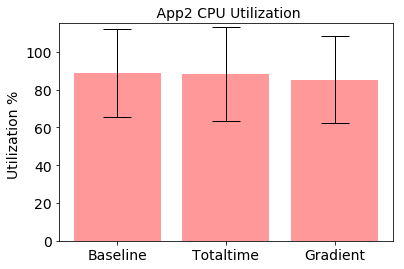

In [192]:
fig = plt.figure()
error_bar_set = dict(lw = 1, capthick = 1, capsize = 14)
plt.bar(np.arange(len(mcpu_data)), np.array(mcpu_data), yerr=np.array(scpu_data), 
        error_kw=error_bar_set, 
        color='red', alpha=0.4)

plt.ylabel("Utilization % ", fontsize=14)
plt.ylim(0,115)
plt.xticks(np.arange(len(mcpu_data)), ['Baseline', 'Totaltime', 'Gradient'])
plt.tick_params(labelsize=14)
plt.title(' App2 CPU Utilization', fontsize=14)
plt.savefig("./app2_cpu_utils.png")

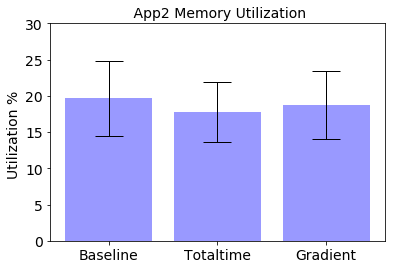

In [193]:
fig = plt.figure()
error_bar_set = dict(lw = 1, capthick = 1, capsize = 14)
plt.bar(np.arange(len(mmem_data)), np.array(mmem_data), yerr=np.array(smem_data), 
        error_kw=error_bar_set, 
        color='blue', alpha=0.4)

plt.ylabel("Utilization % ", fontsize=14)
plt.ylim(0,30)
plt.xticks(np.arange(len(mcpu_data)), ['Baseline', 'Totaltime', 'Gradient'])
plt.tick_params(labelsize=14)
plt.title(' App2 Memory Utilization', fontsize=14)
plt.savefig("./app2_mem_utils.png")

### plot hist and save

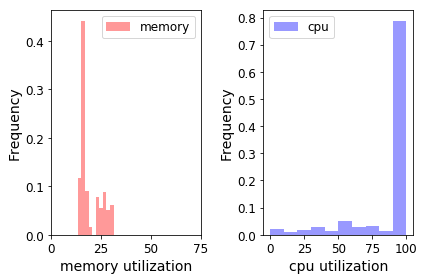

In [82]:
fig = plt.figure()
#
ax = plt.subplot(121)
weights = _get_weight(mems)
plt.hist(mems, weights=weights,label='memory', color='red', alpha=0.4)
plt.legend(fontsize=12)
ax.set_xlabel("memory utilization", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.tick_params(labelsize=12)
ax.set_xticks(np.arange(0,76,25))

#
ax = plt.subplot(122)
weights = _get_weight(cpus)
plt.hist(cpus,weights=weights, label='cpu', color='blue',alpha=0.4)
plt.legend(fontsize=12)
ax.set_xlabel("cpu utilization", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.tick_params(labelsize=12)
ax.set_xticks(np.arange(0,101,25))

#
fig.tight_layout()
#plt.show()
plt.savefig("./"+oname)

### Time series Analysis

app1 simple/total/grd
58471007


In [274]:
app_type='app1'
exp_type='simple'  # simple/total/grd 
jobid='58471007'  #jobid
output_list = glob.glob(workdir+'/'+app_type+'_'+exp_type+'/outputs_app-1*'+jobid+'*.npy') 

In [280]:
mems, cpus, times = [], [], []
for ifile in output_list:
    _mem, _cpu, _time = _common_output(filename=ifile)
    mems.extend(_mem)
    cpus.extend(_cpu)
    times.extend(_time)

In [281]:
_times = []
for idx, i  in enumerate(times):
    if i - times[idx+1] < 0:
        _times += [i]
    else:
        break

In [282]:
_times

[12.115190029144287,
 14.114497184753418,
 16.114277362823486,
 18.11447048187256,
 20.114444255828857,
 22.114271879196167,
 26.114473342895508,
 28.11430597305298,
 30.114280700683594,
 32.11446166038513,
 34.114261627197266,
 36.11426663398743,
 38.11430311203003,
 40.114293575286865,
 42.11426544189453,
 44.11445736885071,
 46.11429572105408,
 48.11429500579834,
 50.114250898361206,
 52.114279985427856,
 54.11425256729126,
 56.11429524421692,
 58.11428475379944,
 60.11429166793823,
 62.11425423622131,
 64.11506772041321,
 66.11426162719727,
 68.11424708366394,
 70.11429977416992]

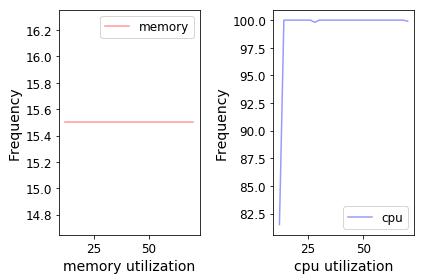

In [284]:
fig = plt.figure()
#
ax = plt.subplot(121)
weights = _get_weight(mems)
plt.plot(_times, mems[:len(_times)],label='memory', color='red', alpha=0.4)
plt.legend(fontsize=12)
ax.set_xlabel("memory utilization", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.tick_params(labelsize=12)

#
ax = plt.subplot(122)
weights = _get_weight(cpus)
plt.plot(_times, cpus[:len(_times)], label='cpu', color='blue',alpha=0.4)
plt.legend(fontsize=12)
ax.set_xlabel("cpu utilization", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.tick_params(labelsize=12)

#
fig.tight_layout()
plt.show()

#### practice

In [ ]:
#def _output_2(filename):
#    array = load_npy(filedir+'/'+filename)
#    output_mem = array[:,0, :]
#    output_cpu = array[:,1, :]

In [57]:
output1_mem_simple, output_cpu_simple = _common_output(filename="outputs_1_slurm-58255369-simple.npy")

In [58]:
len(output1_mem_simple), len(output_cpu_simple)

(5907, 5907)

In [61]:
np.asarray(output_cpu_simple).shape

(5907,)

#### gen ouput

In [62]:
filelist = [
    "outputs_1_slurm-58255369-simple.npy",
    "outputs_2_slurm-58255369-simple.npy",
    "outputs_3_slurm-58255369-simple.npy",
    "outputs_4_slurm-58255369-simple.npy"
]

In [63]:
mem_simple = []
cpu_simple = []
for ifile in filelist:
    _tmp_mem, _tmp_cpu = _common_output(filename=ifile)
    mem_simple.extend(_tmp_mem)
    cpu_simple.extend(_tmp_cpu)

In [65]:
np.asarray(cpu_simple).shape

(11952,)

(array([    0.,     0.,     0.,     0.,     0., 11952.,     0.,     0.,
            0.,     0.]),
 array([18.5, 18.6, 18.7, 18.8, 18.9, 19. , 19.1, 19.2, 19.3, 19.4, 19.5]),
 <a list of 10 Patch objects>)

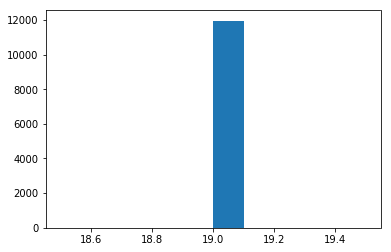

In [66]:
plt.hist(mem_simple)

(array([ 149.,  154.,    0.,    0.,   10.,   34., 1883.,   43.,   29.,
        9650.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

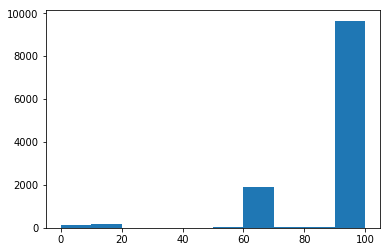

In [67]:
plt.hist(cpu_simple)

In [68]:
_filelist = [
    "outputs_1_slurm-58256907-htex_totaltime.npy",
    "outputs_2_slurm-58256907-htex_totaltime.npy",
    "outputs_3_slurm-58256907-htex_totaltime.npy",
    "outputs_4_slurm-58256907-htex_totaltime.npy"
]

In [76]:
mem_time = []
cpu_time = []
for ifile in _filelist:
    _tmp_mem, _tmp_cpu = _common_output(filename=ifile)
    mem_time.extend(_tmp_mem)
    cpu_time.extend(_tmp_cpu)

(array([    0.,     0.,     0.,     0.,     0., 11929.,     0.,     0.,
            0.,     0.]),
 array([16.2, 16.3, 16.4, 16.5, 16.6, 16.7, 16.8, 16.9, 17. , 17.1, 17.2]),
 <a list of 10 Patch objects>)

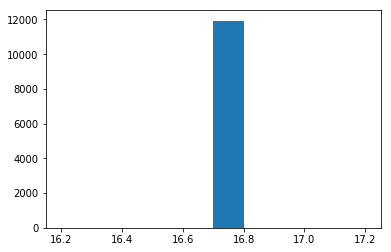

In [77]:
plt.hist(mem_time)

(array([1.180e+02, 1.550e+02, 0.000e+00, 7.000e+00, 2.700e+01, 1.700e+01,
        1.890e+03, 6.700e+01, 1.000e+01, 9.638e+03]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

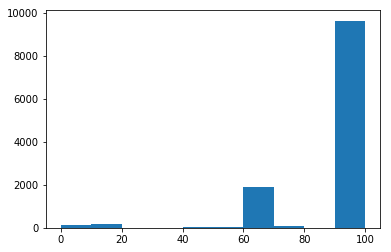

In [78]:
plt.hist(cpu_time)

### pairwise

In [83]:
np.mean(mem_simple), np.mean(mem_time)

(19.0, 16.699999999999996)

In [81]:
np.mean(cpu_simple), np.mean(cpu_time)

(91.14251171352075, 91.25474893117614)

In [84]:
np.std(mem_simple), np.std(mem_time)

(0.0, 3.552713678800501e-15)

In [85]:
np.std(cpu_simple), np.std(cpu_time)

(19.95017377244451, 19.56055178089552)

## Check IO array

### Ouptut 1

In [3]:
a = load_npy("./outputs_1_slurm-58255369-simple.npy")

In [4]:
a.shape

(100, 2)

In [6]:
b =  load_npy("./outputs_1_slurm-58256907-htex_totaltime.npy")

In [7]:
b.shape

(100, 2)

In [32]:
output1_simple_mem = a[:,0]
output1_simple_cpu = a[:,1]

In [31]:
output1_time_mem = b[:,0]
output1_time_cpu = b[:,1]

In [40]:
_a = []
for i in output1_simple_mem:
    _a.extend(i)

In [41]:
len(_a)

5907

### Output 2

In [12]:
c = load_npy("./outputs_2_slurm-58255369-simple.npy")

In [13]:
c.shape

(2, 2, 31)

In [15]:
c[0,0,:]

array([19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19.,
       19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19.,
       19., 19., 19., 19., 19.])

In [16]:
c[0,1,:]

array([59.2, 10.7, 10.7, 10.7, 10.7, 10.7, 10.8, 10.7, 10.7, 10.7, 10.7,
       10.7, 10.7, 10.7, 10.7, 10.7, 10.7, 10.7, 10.7, 10.7, 10.9, 10.7,
       10.7, 10.7, 10.7, 10.7, 10.7, 10.7, 10.7, 10.7,  0. ])

In [17]:
c[1,0,:]

array([19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19.,
       19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19.,
       19., 19., 19., 19., 19.])

In [18]:
c[1,1,:]

array([59.2, 10.7, 10.7, 10.7, 10.7, 10.7, 10.8, 10.7, 10.7, 10.7, 10.7,
       10.7, 10.7, 10.7, 10.7, 10.7, 10.7, 10.7, 10.7, 10.7, 10.9, 10.7,
       10.7, 10.7, 10.7, 10.7, 10.7, 10.7, 10.7, 10.7,  0. ])

In [51]:
output2_simple_mem = c[:,0,:]
output2_simple_cpu = c[:,1,:]

In [52]:
output2_simple_mem.shape

(2, 31)

In [53]:
_output2_simple_mem = c[:,0]

In [54]:
_output2_simple_mem.shape

(2, 31)

In [21]:
output2_simple_cpu

array([[59.2, 10.7, 10.7, 10.7, 10.7, 10.7, 10.8, 10.7, 10.7, 10.7, 10.7,
        10.7, 10.7, 10.7, 10.7, 10.7, 10.7, 10.7, 10.7, 10.7, 10.9, 10.7,
        10.7, 10.7, 10.7, 10.7, 10.7, 10.7, 10.7, 10.7,  0. ],
       [59.2, 10.7, 10.7, 10.7, 10.7, 10.7, 10.8, 10.7, 10.7, 10.7, 10.7,
        10.7, 10.7, 10.7, 10.7, 10.7, 10.7, 10.7, 10.7, 10.7, 10.9, 10.7,
        10.7, 10.7, 10.7, 10.7, 10.7, 10.7, 10.7, 10.7,  0. ]])

In [22]:
len(output2_simple_mem)

2

In [23]:
_c = []
for i in output2_simple_mem:
    _c.extend(i)

In [25]:
len(_c)

62

### Output 3

In [26]:
d = load_npy("./outputs_3_slurm-58255369-simple.npy")

In [27]:
d.shape

(100, 2)

In [30]:
output3_simple_mem = d[:,0]

In [34]:
len(output3_simple_mem)

100

In [37]:
_d = []
for i in output3_simple_mem:
    _d.extend(i)

In [38]:
len(_d)

5899

In [42]:
e = load_npy("./outputs_4_slurm-58255369-simple.npy")

In [43]:
e.shape

(3, 2)

In [46]:
output4_simple_mem = e[:,0]

In [49]:
_e = []
for i in output4_simple_mem:
    _e.extend(i)

In [50]:
len(_e)

84